In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_july=pd.read_csv("train_July.csv")
train_aug=pd.read_csv("train_Aug.csv")
weather=pd.read_csv("weather.csv")
poi=pd.read_csv("poi.csv")
test=pd.read_csv("test_id_Aug_agg_public5k.csv")

In [4]:
train_july.head()

,id,driver_id,member_id,create_date,create_hour,status,estimate_money,estimate_distance,estimate_term,start_geo_id,end_geo_id
0,583411b46a31bcc5d12d4402c928a146,3e69e17a6e5a726fe44d71896bee4f32,6b4d6e4992191fe96b9f27921520d551,2017-07-01,0,2,140.00,20099.0,18.0,6d7827e8dcfa09497954a31e6f7e6ee6,85e49ded1fa70a7bfa01ab0212a6e538
1,396b6e317f915352d3a19f61d2657c46,034f5860624827a65191a9be919fbb3d,c7c93facfd1b10d4e75ff14f479484e2,2017-07-01,0,2,78.00,9000.0,18.0,27d75f17e61587172fe7a6827bbaa198,f5dc996f6aa097f7a84a9bcfe58ed55c
2,c0badb35d04b00b06c54a285abde6e1b,d41d8cd98f00b204e9800998ecf8427e,8325f79b82f697dcce557b4a08f2ae5d,2017-07-01,0,1,86.23,10323.0,20.0,f92dfcc31699ad56d967a57673b8fc65,8c269e40d177f46840aff30baeb25e29
3,9c67ee57c2217c3b2211a66b120d77b2,e4c4e24edd254bb81fc6e3fe7a1a5dd4,bee163f2587d01a9fd9070be4c1e24fc,2017-07-01,0,1,81.88,14197.0,27.0,92e1e8020813ef939183e345626b442a,f80c4ceeb36264b42e34d6c4c2cb9b4c
4,fbd6734ac4938fab06546db06de9b3a9,d41d8cd98f00b204e9800998ecf8427e,644f9f79d6a02a71f048562aad301642,2017-07-01,2,1,217.01,39150.0,40.0,ca902ab284d4bb9e8c2a0bb58d55cf7b,6da3e22032d543214b2893d1c9f2b9e1


In [7]:
train_set=set(train_july.groupby(['start_geo_id','end_geo_id'])['id'].count().to_dict().keys())

In [18]:
sum=0
for i in range(len(test.values)):
    if tuple([test.loc[i,'start_geo_id'],test.loc[i,'end_geo_id']]) not in train_set:
        sum+=1
print(sum)
#在测试集中起点到终点组合完全没有在七月数据中出现过的有346个数据项

346


In [14]:
train_set

{('c538ad66d710f99ad0ce951152da36a4', 'e3343b53f89ccabe265282f520801a40'),
 ('59e9ad69a9b98a75107b2a4ba96cd765', 'b761f87c8f3929fb6af3a5ad22fbf1f8'),
 ('ae63d3d850a455b70a3c2ad3319a6def', 'ad7cd0a017ff17122d872f7621ece80c'),
 ('71adb79e626fb1b09726781fe0c4a7a0', '1246d9b5235e6ace068796b10502d732'),
 ('2439f5972a0b65da303397c790dca20d', 'ee62ad9476f20f81a6c52c8562d0fb76'),
 ('7edf4edc378fa94ec51173f9e59b6a48', 'fc99f438b5517860c4d62dc2ca9eefc5'),
 ('c8ed972d5acea042606ea20858d6fae1', '630239f19499934728de71b167191a30'),
 ('31b5ccb67e92fa05aeb98eda80bbca6c', '872d307bbbad0d64add72906fe049c2b'),
 ('8d8530d8dd5417965d67d6ccdc4077d8', '4f6a14824fcec3dc22cae92f29154429'),
 ('7db7ae89098f4329c771ad7bbb7378ec', '7f21324a1ac626125fed15a3aa3f5c80'),
 ('ad7b6b7b93ea15a4386bee58d14ccf06', '88cc874efdd2c6233f5ec2ca46667cdf'),
 ('19c0659722b4ea178e6f079551505d3b', 'a2a5925a9e5b50c9af3f4115d03ecd1f'),
 ('61f6449ce78f84198612bf6de493c707', 'c538ad66d710f99ad0ce951152da36a4'),
 ('64648d40c718551925b14e

In [35]:
sorted(train_july.groupby(['start_geo_id','end_geo_id'])['id'].count().to_dict(),key=lambda x:x[1],reverse=True)
pos_dict=train_july.groupby(['start_geo_id','end_geo_id'])['id'].count().to_dict()
sorted(pos_dict.items(),key=lambda x:x[1],reverse=True)
#选出的top_5个组合
#('c538ad66d710f99ad0ce951152da36a4', 'c538ad66d710f99ad0ce951152da36a4'),
#('c538ad66d710f99ad0ce951152da36a4', '90bb1d035e403538d20b073aec57bea2'),
#('c538ad66d710f99ad0ce951152da36a4', '6097a8df0b2757894ce7b4a48ae2a692'),
#('90bb1d035e403538d20b073aec57bea2', 'c538ad66d710f99ad0ce951152da36a4'),
#('6097a8df0b2757894ce7b4a48ae2a692', 'c538ad66d710f99ad0ce951152da36a4')

[(('c538ad66d710f99ad0ce951152da36a4', 'c538ad66d710f99ad0ce951152da36a4'),
  5872),
 (('c538ad66d710f99ad0ce951152da36a4', '90bb1d035e403538d20b073aec57bea2'),
  4650),
 (('c538ad66d710f99ad0ce951152da36a4', '6097a8df0b2757894ce7b4a48ae2a692'),
  3643),
 (('90bb1d035e403538d20b073aec57bea2', 'c538ad66d710f99ad0ce951152da36a4'),
  3275),
 (('6097a8df0b2757894ce7b4a48ae2a692', 'c538ad66d710f99ad0ce951152da36a4'),
  3249),
 (('0a64b01e91cf367a9b016d4f6d42290f', '0a64b01e91cf367a9b016d4f6d42290f'),
  3203),
 (('c538ad66d710f99ad0ce951152da36a4', '0a64b01e91cf367a9b016d4f6d42290f'),
  3034),
 (('f5dc996f6aa097f7a84a9bcfe58ed55c', 'c538ad66d710f99ad0ce951152da36a4'),
  2933),
 (('0a64b01e91cf367a9b016d4f6d42290f', 'c538ad66d710f99ad0ce951152da36a4'),
  2878),
 (('c538ad66d710f99ad0ce951152da36a4', '27d75f17e61587172fe7a6827bbaa198'),
  2878),
 (('c538ad66d710f99ad0ce951152da36a4', 'f5dc996f6aa097f7a84a9bcfe58ed55c'),
  2850),
 (('1239d1bfdc532392645d7a37f7469adf', '1239d1bfdc532392645d7a37f

In [11]:
train_july['day']=train_july['create_date'].apply(lambda x:int(str(x).split('-')[2]))
train_aug['day']=train_aug['create_date'].apply(lambda x:int(str(x).split('-')[2]))
test['day']=test['create_date'].apply(lambda x:int(str(x).split('-')[2]))

In [14]:
july_pos_day_hour_dict=train_july.groupby(['start_geo_id','end_geo_id','day','create_hour'])['id'].count().to_dict()

In [15]:
july_pos_day_hour_dict

{('71adb79e626fb1b09726781fe0c4a7a0',
  '1239d1bfdc532392645d7a37f7469adf',
  3L,
  15L): 2,
 ('aa532f0935c3f7f5d2f1f337125998a0',
  '85e49ded1fa70a7bfa01ab0212a6e538',
  20L,
  21L): 1,
 ('fc285cf482f1014cd81d5ba233ac9569',
  '9c98aa0f9e708480e04ce9929a79044d',
  8L,
  14L): 8,
 ('71adb79e626fb1b09726781fe0c4a7a0',
  '71adb79e626fb1b09726781fe0c4a7a0',
  21L,
  10L): 3,
 ('6097a8df0b2757894ce7b4a48ae2a692',
  '27d75f17e61587172fe7a6827bbaa198',
  5L,
  18L): 1,
 ('3d53327ef089e222f9d4aa6823f60c70',
  '8102cf754b959c7b7b12c37eb19f90b8',
  31L,
  10L): 2,
 ('f92dfcc31699ad56d967a57673b8fc65',
  '382c94da4ba84bbd45046ad2fdf3f302',
  30L,
  20L): 2,
 ('6097a8df0b2757894ce7b4a48ae2a692',
  'c538ad66d710f99ad0ce951152da36a4',
  21L,
  8L): 11,
 ('2439f5972a0b65da303397c790dca20d',
  '92906d16e64d3490a412164bc1b69357',
  20L,
  11L): 1,
 ('27d75f17e61587172fe7a6827bbaa198',
  '6371678dd4d13cd49f0472eba1a833f7',
  19L,
  9L): 1,
 ('331a3b2edf5953d58fe7def642d86c16',
  '3bb8f9bcbf742afcb4a3bb7

In [39]:
#选取在七月出现数量最多的五个起点终点组合，以小时为单位进行趋势的分析
top_five_dict={
    ('c538ad66d710f99ad0ce951152da36a4', 'c538ad66d710f99ad0ce951152da36a4'):[],
    ('c538ad66d710f99ad0ce951152da36a4', '90bb1d035e403538d20b073aec57bea2'):[],
    ('c538ad66d710f99ad0ce951152da36a4', '6097a8df0b2757894ce7b4a48ae2a692'):[],
    ('90bb1d035e403538d20b073aec57bea2', 'c538ad66d710f99ad0ce951152da36a4'):[],
    ('6097a8df0b2757894ce7b4a48ae2a692', 'c538ad66d710f99ad0ce951152da36a4'):[]
}
for day in range(1,32):
    for hour in range(24):
        for key in top_five_dict.keys():
            key2=tuple([key[0],key[1],day,hour])
            if key2 in july_pos_day_hour_dict.keys():
                top_five_dict[key].append(july_pos_day_hour_dict[key2])
            else:
                top_five_dict[key].append(0)
x=range(24*31)


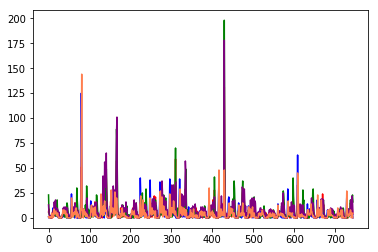

In [44]:
len(top_five_dict[('c538ad66d710f99ad0ce951152da36a4', 'c538ad66d710f99ad0ce951152da36a4')])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
colors=['red','blue','green','purple','coral']
for i in range(5):
    ax.plot(x,top_five_dict[top_five_dict.keys()[i]],color=colors[i])
plt.show()

In [45]:
ax.boxplot

In [153]:
july_train_pos_day_dict=train_july.groupby(["start_geo_id","end_geo_id","day"])['id'].count().to_dict()
aug_train_pos_day_dict=train_aug.groupby(["start_geo_id","end_geo_id","day"])['id'].count().to_dict()
july_train_pos_day_hour_dict=train_july.groupby(["start_geo_id","end_geo_id","day","create_hour"])['id'].count().to_dict()
aug_train_pos_day_hour_dict=train_aug.groupby(["start_geo_id","end_geo_id","day","create_hour"])['id'].count().to_dict()
july_train_pos_dict=train_july.groupby(["start_geo_id","end_geo_id"])['id'].count().to_dict()
aug_train_pos_dict=train_aug.groupby(["start_geo_id","end_geo_id"])['id'].count().to_dict()
july_train_pos_hour_count=train_july.groupby(["start_geo_id","end_geo_id","create_hour"])['id'].count().to_dict()
for k in july_train_pos_hour_count.keys():
    if july_train_pos_hour_count[k]>31:
        july_train_pos_hour_count[k]/=31
    elif july_train_pos_hour_count[k]>15:
        july_train_pos_hour_count[k]=1
    else:
        july_train_pos_hour_count[k]=0

for k in july_train_pos_day_dict.keys():
    july_train_pos_day_dict[k]={}
for k in aug_train_pos_day_dict.keys():
    aug_train_pos_day_dict[k]={}
test['count']=np.nan
def cal_count(x):
    day_hour_tuple_before=tuple([x['start_geo_id'],x['end_geo_id'],x['day'],x['create_hour']-1])
    day_hour_tuple_after=tuple([x['start_geo_id'],x['end_geo_id'],x['day'],x['create_hour']+1])
    mean_hour=tuple([x['start_geo_id'],x['end_geo_id'],x['create_hour']])
    if day_hour_tuple_before in aug_train_pos_day_hour_dict.keys() and day_hour_tuple_after in aug_train_pos_day_hour_dict.keys():
        return (aug_train_pos_day_hour_dict[day_hour_tuple_after]+aug_train_pos_day_hour_dict[day_hour_tuple_before])/2
    elif day_hour_tuple_after in aug_train_pos_day_hour_dict.keys():
        return aug_train_pos_day_hour_dict[day_hour_tuple_after]
    elif day_hour_tuple_before in aug_train_pos_day_hour_dict.keys():
        return aug_train_pos_day_hour_dict[day_hour_tuple_before]
    elif day_hour_tuple_before in july_train_pos_day_hour_dict.keys() and day_hour_tuple_after in july_train_pos_day_hour_dict.keys():
        return (july_train_pos_day_hour_dict[day_hour_tuple_after]+july_train_pos_day_hour_dict[day_hour_tuple_before])/2
    elif day_hour_tuple_after in july_train_pos_day_hour_dict.keys():
        return july_train_pos_day_hour_dict[day_hour_tuple_after]
    elif day_hour_tuple_before in july_train_pos_day_hour_dict.keys():
        return july_train_pos_day_hour_dict[day_hour_tuple_before]
    elif mean_hour in july_train_pos_hour_count.keys():
        return july_train_pos_hour_count[mean_hour]
    else:
        return np.nan
    
for i in range(len(test.values)):
    test.loc[i,'count']=cal_count(test.loc[i,:])
    
    
    

In [157]:
tuple(["7f21324a1ac626125fed15a3aa3f5c80","1953c00f0df67dc2b19265abf685c6bf"]) in july_train_pos_day_dict.keys()

False

In [158]:
test['count']=test['count'].fillna(0)

,test_id,count
0,0,18.0
1,1,13.0
2,2,7.0
3,3,9.0
4,4,2.0


In [163]:
drop_columns=['start_geo_id','end_geo_id','create_date','create_hour','day']
test=test.drop(drop_columns,axis=1)

In [167]:
test['count']=test['count'].astype(np.int8)

In [28]:
test.to_csv('submission.csv',index=False)

In [5]:
train_july.head()

,id,driver_id,member_id,create_date,create_hour,status,estimate_money,estimate_distance,estimate_term,start_geo_id,end_geo_id,day
0,583411b46a31bcc5d12d4402c928a146,3e69e17a6e5a726fe44d71896bee4f32,6b4d6e4992191fe96b9f27921520d551,2017-07-01,0,2,140.00,20099.0,18.0,6d7827e8dcfa09497954a31e6f7e6ee6,85e49ded1fa70a7bfa01ab0212a6e538,1
1,396b6e317f915352d3a19f61d2657c46,034f5860624827a65191a9be919fbb3d,c7c93facfd1b10d4e75ff14f479484e2,2017-07-01,0,2,78.00,9000.0,18.0,27d75f17e61587172fe7a6827bbaa198,f5dc996f6aa097f7a84a9bcfe58ed55c,1
2,c0badb35d04b00b06c54a285abde6e1b,d41d8cd98f00b204e9800998ecf8427e,8325f79b82f697dcce557b4a08f2ae5d,2017-07-01,0,1,86.23,10323.0,20.0,f92dfcc31699ad56d967a57673b8fc65,8c269e40d177f46840aff30baeb25e29,1
3,9c67ee57c2217c3b2211a66b120d77b2,e4c4e24edd254bb81fc6e3fe7a1a5dd4,bee163f2587d01a9fd9070be4c1e24fc,2017-07-01,0,1,81.88,14197.0,27.0,92e1e8020813ef939183e345626b442a,f80c4ceeb36264b42e34d6c4c2cb9b4c,1
4,fbd6734ac4938fab06546db06de9b3a9,d41d8cd98f00b204e9800998ecf8427e,644f9f79d6a02a71f048562aad301642,2017-07-01,2,1,217.01,39150.0,40.0,ca902ab284d4bb9e8c2a0bb58d55cf7b,6da3e22032d543214b2893d1c9f2b9e1,1


In [52]:
num_dict=train_july.groupby("create")['id'].count().to_dict()

In [53]:
x=[]
y=[]
for k,v in num_dict.items():
    x.append(k)
    y.append(v)

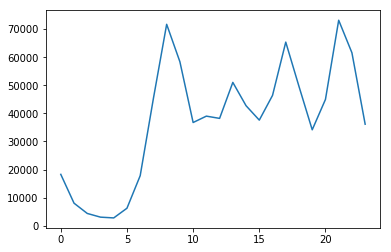

In [56]:
#可以看到，人流量峰谷期是在每一天的0点到5点之间，而高峰期是在每一天的早上8点到9点，中午12点到13点，下午5点到6点，晚上9点到10点之间
#由此可以知道，如果是按照前后时间均值填充的话，只能是对于比较平稳的时间段比较适合（0点到5点之间），白天的数据波动比较大，可能不太适合
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x,y)
plt.show()

In [51]:
july_dict=train_july.groupby(['day','create_hour'])['id'].count().to_dict()
sorted(july_dict.items(),key=lambda x:x[1])

[((3L, 4L), 46),
 ((4L, 3L), 47),
 ((25L, 4L), 49),
 ((26L, 3L), 49),
 ((26L, 4L), 49),
 ((25L, 3L), 52),
 ((17L, 3L), 53),
 ((18L, 3L), 53),
 ((3L, 3L), 53),
 ((4L, 4L), 54),
 ((20L, 4L), 61),
 ((18L, 4L), 63),
 ((24L, 3L), 63),
 ((27L, 4L), 65),
 ((5L, 3L), 65),
 ((11L, 4L), 66),
 ((17L, 4L), 66),
 ((11L, 3L), 66),
 ((31L, 3L), 69),
 ((3L, 2L), 70),
 ((9L, 4L), 70),
 ((20L, 3L), 71),
 ((5L, 4L), 72),
 ((2L, 4L), 72),
 ((31L, 4L), 73),
 ((21L, 3L), 74),
 ((13L, 4L), 75),
 ((6L, 4L), 76),
 ((21L, 4L), 77),
 ((6L, 3L), 79),
 ((24L, 4L), 80),
 ((13L, 3L), 82),
 ((12L, 3L), 84),
 ((19L, 3L), 86),
 ((7L, 3L), 88),
 ((30L, 4L), 88),
 ((25L, 2L), 88),
 ((10L, 4L), 91),
 ((17L, 2L), 91),
 ((29L, 4L), 93),
 ((19L, 4L), 94),
 ((28L, 3L), 94),
 ((27L, 3L), 96),
 ((12L, 4L), 96),
 ((23L, 4L), 97),
 ((18L, 2L), 98),
 ((5L, 2L), 99),
 ((2L, 5L), 100),
 ((31L, 2L), 101),
 ((10L, 3L), 101),
 ((1L, 4L), 101),
 ((28L, 4L), 103),
 ((20L, 2L), 103),
 ((4L, 2L), 103),
 ((30L, 3L), 104),
 ((9L, 3L), 105),


In [22]:
aug_dict=train_aug.groupby(["day","create_hour"])['id'].count().to_dict()
x=[]
y=[]
for k,v in sorted(aug_dict.items()):
    x.append((k[0]-1)*24+k[1])
    y.append(v)

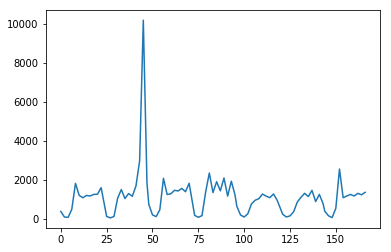

In [23]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x,y)
plt.show()
#可以发现在2号晚上九点出现了异常值，二号是是建军节的后一天，但是国家的法定节假日是军人1号休息半天
#可能是异常值，因为什么事件能够导致突然多了接近8000人去打车呢？但是猜想是有可能由于突然增多的出发点和目的地组合的增多导致，接下来验证

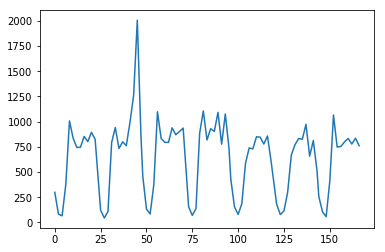

In [20]:
pos_hour_dict=train_aug.groupby(['start_geo_id','end_geo_id','day','create_hour'])['id'].count().to_dict()
print(pos_hour_dict)
result={}
for k,v in pos_hour_dict.items():
    result.setdefault((k[2],k[3]),set())
    result[(k[2],k[3])].add((k[0],k[1]))
x=[]
y=[]
sorted(result)
for k in sorted(result):
    result[k]=len(result[k])
    x.append((k[0]-1)*24+k[1])
    y.append(result[k])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x,y)
plt.show()

In [18]:
result
#可以看到2号晚上九点数量增多是由于出发点和目的地的组合数量引起的，那么9点和10点的数据就可以用均值来填

{(1L, 0L): 299,
 (1L, 2L): 82,
 (1L, 4L): 66,
 (1L, 6L): 375,
 (1L, 8L): 1007,
 (1L, 10L): 836,
 (1L, 12L): 744,
 (1L, 14L): 746,
 (1L, 16L): 853,
 (1L, 18L): 802,
 (1L, 20L): 894,
 (1L, 22L): 825,
 (2L, 1L): 120,
 (2L, 3L): 45,
 (2L, 5L): 108,
 (2L, 7L): 793,
 (2L, 9L): 942,
 (2L, 11L): 734,
 (2L, 13L): 800,
 (2L, 15L): 762,
 (2L, 17L): 993,
 (2L, 19L): 1261,
 (2L, 21L): 2006,
 (2L, 23L): 857,
 (3L, 0L): 455,
 (3L, 2L): 134,
 (3L, 4L): 84,
 (3L, 6L): 373,
 (3L, 8L): 1098,
 (3L, 10L): 833,
 (3L, 12L): 795,
 (3L, 14L): 794,
 (3L, 16L): 939,
 (3L, 18L): 870,
 (3L, 20L): 902,
 (3L, 22L): 936,
 (4L, 1L): 155,
 (4L, 3L): 70,
 (4L, 5L): 137,
 (4L, 7L): 885,
 (4L, 9L): 1106,
 (4L, 11L): 818,
 (4L, 13L): 930,
 (4L, 15L): 903,
 (4L, 17L): 1092,
 (4L, 19L): 777,
 (4L, 21L): 1076,
 (4L, 23L): 736,
 (5L, 0L): 430,
 (5L, 2L): 155,
 (5L, 4L): 80,
 (5L, 6L): 185,
 (5L, 8L): 585,
 (5L, 10L): 739,
 (5L, 12L): 730,
 (5L, 14L): 850,
 (5L, 16L): 846,
 (5L, 18L): 778,
 (5L, 20L): 858,
 (5L, 22L): 603,
 (6L

In [30]:
#接下来针对七月的数据进行分析
train_july.head()

,id,driver_id,member_id,create_date,create_hour,status,estimate_money,estimate_distance,estimate_term,start_geo_id,end_geo_id,day
0,583411b46a31bcc5d12d4402c928a146,3e69e17a6e5a726fe44d71896bee4f32,6b4d6e4992191fe96b9f27921520d551,2017-07-01,0,2,140.00,20099.0,18.0,6d7827e8dcfa09497954a31e6f7e6ee6,85e49ded1fa70a7bfa01ab0212a6e538,1
1,396b6e317f915352d3a19f61d2657c46,034f5860624827a65191a9be919fbb3d,c7c93facfd1b10d4e75ff14f479484e2,2017-07-01,0,2,78.00,9000.0,18.0,27d75f17e61587172fe7a6827bbaa198,f5dc996f6aa097f7a84a9bcfe58ed55c,1
2,c0badb35d04b00b06c54a285abde6e1b,d41d8cd98f00b204e9800998ecf8427e,8325f79b82f697dcce557b4a08f2ae5d,2017-07-01,0,1,86.23,10323.0,20.0,f92dfcc31699ad56d967a57673b8fc65,8c269e40d177f46840aff30baeb25e29,1
3,9c67ee57c2217c3b2211a66b120d77b2,e4c4e24edd254bb81fc6e3fe7a1a5dd4,bee163f2587d01a9fd9070be4c1e24fc,2017-07-01,0,1,81.88,14197.0,27.0,92e1e8020813ef939183e345626b442a,f80c4ceeb36264b42e34d6c4c2cb9b4c,1
4,fbd6734ac4938fab06546db06de9b3a9,d41d8cd98f00b204e9800998ecf8427e,644f9f79d6a02a71f048562aad301642,2017-07-01,2,1,217.01,39150.0,40.0,ca902ab284d4bb9e8c2a0bb58d55cf7b,6da3e22032d543214b2893d1c9f2b9e1,1


In [49]:
july_day_num_dict=train_july.groupby(['day','create_hour'])['id'].count().to_dict()

In [51]:
july_day_num_dict

{(1L, 0L): 1398,
 (1L, 1L): 507,
 (1L, 2L): 258,
 (1L, 3L): 146,
 (1L, 4L): 101,
 (1L, 5L): 204,
 (1L, 6L): 326,
 (1L, 7L): 525,
 (1L, 8L): 861,
 (1L, 9L): 1072,
 (1L, 10L): 1192,
 (1L, 11L): 1275,
 (1L, 12L): 1277,
 (1L, 13L): 1469,
 (1L, 14L): 1468,
 (1L, 15L): 1218,
 (1L, 16L): 1496,
 (1L, 17L): 1774,
 (1L, 18L): 1179,
 (1L, 19L): 855,
 (1L, 20L): 1227,
 (1L, 21L): 1381,
 (1L, 22L): 1007,
 (1L, 23L): 784,
 (2L, 0L): 468,
 (2L, 1L): 251,
 (2L, 2L): 160,
 (2L, 3L): 121,
 (2L, 4L): 72,
 (2L, 5L): 100,
 (2L, 6L): 208,
 (2L, 7L): 390,
 (2L, 8L): 643,
 (2L, 9L): 786,
 (2L, 10L): 1024,
 (2L, 11L): 1368,
 (2L, 12L): 1239,
 (2L, 13L): 1355,
 (2L, 14L): 1412,
 (2L, 15L): 1069,
 (2L, 16L): 1178,
 (2L, 17L): 1530,
 (2L, 18L): 1089,
 (2L, 19L): 893,
 (2L, 20L): 1106,
 (2L, 21L): 1265,
 (2L, 22L): 980,
 (2L, 23L): 1057,
 (3L, 0L): 440,
 (3L, 1L): 127,
 (3L, 2L): 70,
 (3L, 3L): 53,
 (3L, 4L): 46,
 (3L, 5L): 140,
 (3L, 6L): 839,
 (3L, 7L): 1731,
 (3L, 8L): 2375,
 (3L, 9L): 1787,
 (3L, 10L): 1023,
 

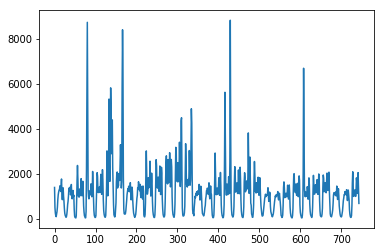

In [54]:
x=[]
y=[]
for k in sorted(july_day_num_dict):
    x.append((k[0]-1)*24+k[1])
    y.append(july_day_num_dict[k])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x,y)
plt.show()

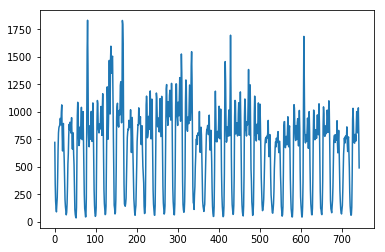

In [56]:
#可以发现订单数量有明显的以星期为单位的周期性，而且出发点与目的地数量也有明显的周期特征
pos_hour_dict=train_july.groupby(['start_geo_id','end_geo_id','day','create_hour'])['id'].count().to_dict()
print(pos_hour_dict)
result={}
for k,v in pos_hour_dict.items():
    result.setdefault((k[2],k[3]),set())
    result[(k[2],k[3])].add(k[0]+k[1])
x=[]
y=[]
sorted(result)
for k in sorted(result):
    result[k]=len(result[k])
    x.append((k[0]-1)*24+k[1])
    y.append(result[k])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x,y)
plt.show()

In [57]:
#第一种想法：由于0点到5点的数据波动比较小，所以在1,2,3,4点的数据用两边均值来填充，而其他点的数据用前四周的同一时间均值来填充
#更多思考：数据的trend以及数据周与周之间的相似性

In [65]:
#计算星期
mon=[10,17,24,31]
tue=[4,11,18,25]
wed=[5,12,19,26]
thr=[6,13,20,27]
fri=[7,14,21,28]
sat=[8,15,22,29]
sun=[9,16,23,30]
def july_cal_day(x):
    if x in mon:
        return 1
    elif x in tue:
        return 2
    elif x in wed:
        return 3
    elif x in thr:
        return 4
    elif x in fri:
        return 5
    elif x in sat:
        return 6
    elif x in sun:
        return 7
    else:
        return 0
train_july['day_of_week']=train_july['day'].apply(july_cal_day)
def aug_cal_day(x):
    if x<=6:
        return x+1
    else:
        return (x+1)%7
train_aug['day_of_week']=train_aug['day'].apply(aug_cal_day)
test['day_of_week']=test['day'].apply(aug_cal_day)
mean_day_hour_dict=(train_july.groupby(['start_geo_id','end_geo_id','day_of_week','create_hour'])['id'].count()/4).to_dict()
def norm(x):
    if x-int(x)>0.5:
        return int(x)+1
    else:
        return int(x)
for k in mean_day_hour_dict.keys():
    mean_day_hour_dict[k]=norm(mean_day_hour_dict[k])

In [66]:
july_train_pos_day_hour_dict=train_july.groupby(["start_geo_id","end_geo_id","day","create_hour"])['id'].count().to_dict()
aug_train_pos_day_hour_dict=train_aug.groupby(["start_geo_id","end_geo_id","day","create_hour"])['id'].count().to_dict()

test['count']=np.nan
def cal_count(x):
    sum=0.0
    #if x['create_hour'] in mean_hours or (x['day']==1 and x['create_hour'] in (20,22)):
    day_hour_tuple_before=tuple([x['start_geo_id'],x['end_geo_id'],x['day'],x['create_hour']-1])
    day_hour_tuple_after=tuple([x['start_geo_id'],x['end_geo_id'],x['day'],x['create_hour']+1])
    i=tuple([x['start_geo_id'],x['end_geo_id'],x['day_of_week'],x['create_hour']])
    mean_hour=tuple([x['start_geo_id'],x['end_geo_id'],x['create_hour']])
    if day_hour_tuple_before in aug_train_pos_day_hour_dict.keys() and day_hour_tuple_after in aug_train_pos_day_hour_dict.keys():
        sum=(aug_train_pos_day_hour_dict[day_hour_tuple_after]+aug_train_pos_day_hour_dict[day_hour_tuple_before])/2
        if i in mean_day_hour_dict.keys():
            if sum==0.0:
                sum=mean_day_hour_dict[i]
            else:
                sum=(sum+mean_day_hour_dict[i])/2
        return sum
    elif day_hour_tuple_after in aug_train_pos_day_hour_dict.keys():
        sum=aug_train_pos_day_hour_dict[day_hour_tuple_after]
        if i in mean_day_hour_dict.keys():
            if sum==0.0:
                sum=mean_day_hour_dict[i]
            else:
                sum=(sum+mean_day_hour_dict[i])/2
        return sum
    elif day_hour_tuple_before in aug_train_pos_day_hour_dict.keys():
        sum=aug_train_pos_day_hour_dict[day_hour_tuple_before]
        if i in mean_day_hour_dict.keys():
            if sum==0.0:
                sum=mean_day_hour_dict[i]
            else:
                sum=(sum+mean_day_hour_dict[i])/2
        return sum
    elif i in mean_day_hour_dict.keys():
        return mean_day_hour_dict[i]
    else:
        return np.nan
    
for i in range(len(test.values)):
    test.loc[i,'count']=cal_count(test.loc[i,:])
print(test.count())

test_id         5000
start_geo_id    5000
end_geo_id      5000
create_date     5000
create_hour     5000
day             5000
day_of_week     5000
count           3352
dtype: int64


In [23]:
pos_dict=train_aug.groupby(['start_geo_id','end_geo_id'])['id'].count().to_dict()
pos_dict

{('59e9ad69a9b98a75107b2a4ba96cd765', 'e8075aa7f0fc96871cc204bea0696b43'): 3,
 ('f92dfcc31699ad56d967a57673b8fc65', '44a5de5644ca5ad7365a5d1df6d24448'): 3,
 ('87787343bdb24fee64bde23f729dc37f', 'ba20ac2de22cfe373f316eaa256b85fc'): 1,
 ('f2d3b898f1bafbf32a5765777cb02b04', 'e6767290d98fdb12c7b5e5d2bf1a0ff0'): 1,
 ('3d99665144344fc090b5b7450ffe72f5', 'b14d0536451c4f8dfc66d405ada124c5'): 13,
 ('c538ad66d710f99ad0ce951152da36a4', 'e3343b53f89ccabe265282f520801a40'): 1,
 ('013530d34f5d858c8441e62f5099c92f', '01d3309d522181f98c59e71276a3ad24'): 3,
 ('2439f5972a0b65da303397c790dca20d', 'ee62ad9476f20f81a6c52c8562d0fb76'): 3,
 ('0e9d5c24b472d5ce239c7cb84ecf62f5', '7f21324a1ac626125fed15a3aa3f5c80'): 1,
 ('f68c7b61e53eccd9f70b0a2d0da8062a', 'ae63d3d850a455b70a3c2ad3319a6def'): 2,
 ('975ecae69f2a7333ee3d23aa83e9fce4', 'fc7e3c725b2cab95569b7bb7095c4a4a'): 1,
 ('af08eba5768fad8b2448d7e4345dff06', 'f841c6a1468682b782fc80aaf4b833d9'): 3,
 ('71adb79e626fb1b09726781fe0c4a7a0', 'dbc59ea85ca0449a2bee77fe

In [69]:
#观察没有在
a=[]
for i in range(len(test.values)):
    if str(test.loc[i,'count'])=='nan':
        t=tuple([test.loc[i,'start_geo_id'],test.loc[i,'end_geo_id']])
        if t in pos_dict.keys():
            a.append(pos_dict[t])
test.fillna(1,inplace=True)
drop_columns=['start_geo_id','day_of_week','end_geo_id','create_date','create_hour','day']
test=test.drop(drop_columns,axis=1)
test.to_csv('submission.csv',index=False)

In [68]:
sorted(a,reverse=True)

[299,
 288,
 164,
 139,
 123,
 118,
 118,
 113,
 94,
 78,
 78,
 74,
 74,
 69,
 67,
 65,
 60,
 58,
 58,
 57,
 57,
 51,
 51,
 50,
 49,
 45,
 44,
 44,
 43,
 43,
 43,
 43,
 43,
 40,
 40,
 40,
 40,
 40,
 39,
 39,
 38,
 38,
 37,
 37,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 1

In [1]:
"""
    1 如果某个起始地点和目的地组合之前在某一个阶段没有记录（比如一周内），但是在另一个时间段数量很高，那有可能是没有对其进行统计
    2 前一个小时和后一个小时加权，星期加权，小时平均之后与星期平均再进行加权
"""

'\n    1 \xe5\xa6\x82\xe6\x9e\x9c\xe6\x9f\x90\xe4\xb8\xaa\xe8\xb5\xb7\xe5\xa7\x8b\xe5\x9c\xb0\xe7\x82\xb9\xe5\x92\x8c\xe7\x9b\xae\xe7\x9a\x84\xe5\x9c\xb0\xe7\xbb\x84\xe5\x90\x88\xe4\xb9\x8b\xe5\x89\x8d\xe5\x9c\xa8\xe6\x9f\x90\xe4\xb8\x80\xe4\xb8\xaa\xe9\x98\xb6\xe6\xae\xb5\xe6\xb2\xa1\xe6\x9c\x89\xe8\xae\xb0\xe5\xbd\x95\xef\xbc\x88\xe6\xaf\x94\xe5\xa6\x82\xe4\xb8\x80\xe5\x91\xa8\xe5\x86\x85\xef\xbc\x89\xef\xbc\x8c\xe4\xbd\x86\xe6\x98\xaf\xe5\x9c\xa8\xe5\x8f\xa6\xe4\xb8\x80\xe4\xb8\xaa\xe6\x97\xb6\xe9\x97\xb4\xe6\xae\xb5\xe6\x95\xb0\xe9\x87\x8f\xe5\xbe\x88\xe9\xab\x98\xef\xbc\x8c\xe9\x82\xa3\xe6\x9c\x89\xe5\x8f\xaf\xe8\x83\xbd\xe6\x98\xaf\xe6\xb2\xa1\xe6\x9c\x89\xe5\xaf\xb9\xe5\x85\xb6\xe8\xbf\x9b\xe8\xa1\x8c\xe7\xbb\x9f\xe8\xae\xa1\n    2 \xe5\x89\x8d\xe4\xb8\x80\xe4\xb8\xaa\xe5\xb0\x8f\xe6\x97\xb6\xe5\x92\x8c\xe5\x90\x8e\xe4\xb8\x80\xe4\xb8\xaa\xe5\xb0\x8f\xe6\x97\xb6\xe5\x8a\xa0\xe6\x9d\x83\xef\xbc\x8c\xe6\x98\x9f\xe6\x9c\x9f\xe5\x8a\xa0\xe6\x9d\x83\xef\xbc\x8c\xe5\xb0\x8f\xe6\x97\xb